# E-Commerce Data

## 1. Import Libraries and Raw Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import normalize

df = pd.read_csv('data/raw/data.csv', encoding='ISO-8859-1')

## 2. Exploratory Data Analysis

In [2]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [3]:
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**Observations**:

- "Description" is lacking about 1,500 rows - drop these rows since it's not a lot and we can afford it.
- "CustomerID" is lacking about 135,000 rows! - drop or impute? For feature engineering later, all the other features will be sorted based on this feature, and there is no good way to impute these values, thus we should drop these rows.
- "Quantity" contains very large negative and very large positive values - looking at the cells below, negative quantity can be removed, while the positive quantity items look reasonable and can be kept.
- "Unit Price" contains very large negative and very large positive values - looking at the cells below, there are only 2 quantities for negative unit price which is for adjusting bad debt (and not linked to customer), which can be removed. As for the very large positive values of unit price, they will be dropped either from negative quantities or no customer ID.

In [5]:
df.loc[df["UnitPrice"]>10000]

InvoiceNo  StockCode      Description  Quantity      InvoiceDate  \
15016    C537630  AMAZONFEE       AMAZON FEE        -1  12/7/2010 15:04   
15017     537632  AMAZONFEE       AMAZON FEE         1  12/7/2010 15:08   
16232    C537644  AMAZONFEE       AMAZON FEE        -1  12/7/2010 15:34   
16356    C537651  AMAZONFEE       AMAZON FEE        -1  12/7/2010 15:49   
43702    C540117  AMAZONFEE       AMAZON FEE        -1    1/5/2011 9:55   
43703    C540118  AMAZONFEE       AMAZON FEE        -1    1/5/2011 9:57   
222681   C556445          M           Manual        -1  6/10/2011 15:31   
299982   A563185          B  Adjust bad debt         1  8/12/2011 14:50   
524601   C580604  AMAZONFEE       AMAZON FEE        -1  12/5/2011 11:35   
524602   C580605  AMAZONFEE       AMAZON FEE        -1  12/5/2011 11:36   

        UnitPrice  CustomerID         Country  
15016    13541.33         NaN  United Kingdom  
15017    13541.33         NaN  United Kingdom  
16232    13474.79         NaN  United Kingdom  
16356    13541.33         NaN  United Kingdom  
43702    16888.02         NaN  United Kingdom  
43703    16453.71         NaN  United Kingdom  
222681   38970.00     15098.0  United Kingdom  
299982   11062.06         NaN  United Kingdom  
524601   11586.50         NaN  United Kingdom  
524602   17836.46         NaN  United Kingdom

In [6]:
df.loc[df["UnitPrice"]<0]

InvoiceNo StockCode      Description  Quantity      InvoiceDate  \
299983   A563186         B  Adjust bad debt         1  8/12/2011 14:51   
299984   A563187         B  Adjust bad debt         1  8/12/2011 14:52   

        UnitPrice  CustomerID         Country  
299983  -11062.06         NaN  United Kingdom  
299984  -11062.06         NaN  United Kingdom

In [7]:
df.loc[df["Quantity"]>10000]

InvoiceNo StockCode                     Description  Quantity  \
61619     541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   
502122    578841     84826  ASSTD DESIGN 3D PAPER STICKERS     12540   
540421    581483     23843     PAPER CRAFT , LITTLE BIRDIE     80995   

             InvoiceDate  UnitPrice  CustomerID         Country  
61619    1/18/2011 10:01       1.04     12346.0  United Kingdom  
502122  11/25/2011 15:57       0.00     13256.0  United Kingdom  
540421    12/9/2011 9:15       2.08     16446.0  United Kingdom

In [8]:
df.loc[df["Quantity"]<0]

InvoiceNo StockCode                          Description  Quantity  \
141      C536379         D                             Discount        -1   
154      C536383    35004C      SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556       PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984     PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983     PACK OF 12 BLUE PAISLEY TISSUES        -24   
238      C536391     21980    PACK OF 12 RED RETROSPOT TISSUES        -24   
239      C536391     21484          CHICK GREY HOT WATER BOTTLE       -12   
240      C536391     22557     PLASTERS IN TIN VINTAGE PAISLEY        -12   
241      C536391     22553               PLASTERS IN TIN SKULLS       -24   
939      C536506     22960             JAM MAKING SET WITH JARS        -6   
1441     C536543     22632            HAND WARMER RED RETROSPOT        -1   
1442     C536543     22355            CHARLOTTE BAG SUKI DESIGN        -2   
1973     C536548     22244           3 HOOK HANGER MAGIC GARDEN        -4   
1974     C536548     22242        5 HOOK HANGER MAGIC TOADSTOOL        -5   
1975     C536548     20914  SET/5 RED RETROSPOT LID GLASS BOWLS        -1   
1976     C536548     22892    SET OF SALT AND PEPPER TOADSTOOLS        -7   
1977     C536548     22654                   DELUXE SEWING KIT         -1   
1978     C536548     22767          TRIPLE PHOTO FRAME CORNICE         -2   
1979     C536548     22333    RETROSPOT PARTY BAG + STICKER SET        -1   
1980     C536548     22245         HOOK, 1 HANGER ,MAGIC GARDEN        -2   
1981     C536548     22077               6 RIBBONS RUSTIC CHARM        -6   
1982     C536548     22631             CIRCUS PARADE LUNCH BOX         -1   
1983     C536548     22168        ORGANISER WOOD ANTIQUE WHITE         -2   
1984     C536548     21218               RED SPOTTY BISCUIT TIN        -3   
1985     C536548     20957         PORCELAIN HANGING BELL SMALL        -1   
1986     C536548     22580         ADVENT CALENDAR GINGHAM SACK        -4   
2406      536589     21777                                  NaN       -10   
3170     C536606     20914  SET/5 RED RETROSPOT LID GLASS BOWLS        -2   
3338     C536622     22752         SET 7 BABUSHKA NESTING BOXES        -2   
3410     C536625     22839      3 TIER CAKE TIN GREEN AND CREAM        -2   
...          ...       ...                                  ...       ...   
538565   C581409     22173   METAL 4 HOOK HANGER FRENCH CHATEAU        -2   
538566   C581409    85199L  LARGE HANGING IVORY & RED WOOD BIRD        -1   
538567   C581409     85127   SMALL SQUARE CUT GLASS CANDLESTICK        -5   
538919    581422     23169                              smashed      -235   
540072   C581460     22197                       POPCORN HOLDER        -5   
540073   C581460     22107                   PIZZA PLATE IN BOX        -1   
540078   C581462     16219         HOUSE SHAPE PENCIL SHARPENER       -48   
540079   C581462     21642            ASSORTED TUTTI FRUTTI PEN       -72   
540080   C581463     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        -2   
540081   C581464     23458             DOLLY CABINET 3 DRAWERS         -1   
540082   C581464     71477   COLOURED GLASS STAR T-LIGHT HOLDER        -6   
540083   C581465     23660                   HENRIETTA HEN MUG         -2   
540084   C581465     22171     3 HOOK PHOTO SHELF ANTIQUE WHITE        -1   
540085   C581465     21876                        POTTERING MUG        -4   
540086   C581465     20914  SET/5 RED RETROSPOT LID GLASS BOWLS        -3   
540087   C581466     22838        3 TIER CAKE TIN RED AND CREAM        -1   
540088   C581466     22720    SET OF 3 CAKE TINS PANTRY DESIGN         -2   
540089   C581466     21216     SET 3 RETROSPOT TEA,COFFEE,SUGAR        -1   
540090   C581466     21535         RED RETROSPOT SMALL MILK JUG        -2   
540091   C581466     21232       STRAWBERRY CERAMIC TRINKET POT        -1   
540

## 3. Data Cleaning

In [9]:
# Drop all rows with null values, which would be "Description" and "CustomerID"
df_clean = df.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null object
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [10]:
# Drop all negative values of "Quantity" and "UnitPrice"
df_clean = df_clean.drop(df_clean[(df_clean['Quantity'] < 0)].index)
df_clean = df_clean.drop(df_clean[(df_clean['UnitPrice'] < 0)].index)

In [11]:
df_clean.describe()

Quantity      UnitPrice     CustomerID
count  397924.000000  397924.000000  397924.000000
mean       13.021823       3.116174   15294.315171
std       180.420210      22.096788    1713.169877
min         1.000000       0.000000   12346.000000
25%         2.000000       1.250000   13969.000000
50%         6.000000       1.950000   15159.000000
75%        12.000000       3.750000   16795.000000
max     80995.000000    8142.750000   18287.000000

## 4. Feature Engineering

In the dataset, each row contains information about an e-commerce transaction. However, we want to cluster the data by customers. This means that each row should instead contain information about a customer.

Reshape the data such that the following columns will be shown:

['NoOfInvoices', 'NoOfUniqueItems', 'QuantityPerInvoice', 'TotalQuantity', 'UniqueItemsPerInvoice','UnitPriceMean','UnitPriceStd']

In [12]:
df_final = df_clean.groupby('CustomerID')[['InvoiceNo']].count()
df_final = df_final.rename(columns={"InvoiceNo": "NoOfInvoices"})

df_final['NoOfUniqueItems'] = df_clean.groupby('CustomerID')[['Description']].nunique()
df_final['TotalQuantity'] = df_clean.groupby('CustomerID')[['Quantity']].sum()
df_final['UnitPriceMean'] = df_clean.groupby('CustomerID')[['UnitPrice']].mean()
df_final['UnitPriceStd'] = df_clean.groupby('CustomerID')[['UnitPrice']].std()

df_final['QuantityPerInvoice'] = df_final['TotalQuantity'] / df_final['NoOfInvoices']
df_final['UniqueItemsPerInvoice'] = df_final['NoOfUniqueItems'] / df_final['NoOfInvoices']

In [13]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4339 entries, 12346.0 to 18287.0
Data columns (total 7 columns):
NoOfInvoices             4339 non-null int64
NoOfUniqueItems          4339 non-null int64
TotalQuantity            4339 non-null int64
UnitPriceMean            4339 non-null float64
UnitPriceStd             4267 non-null float64
QuantityPerInvoice       4339 non-null float64
UniqueItemsPerInvoice    4339 non-null float64
dtypes: float64(4), int64(3)
memory usage: 271.2 KB


In [14]:
# Some of the UnitPriceStd are NaN, because there is only 1 item. For these, replace NaN with 0.
df_final = df_final.fillna(0)

In [15]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4339 entries, 12346.0 to 18287.0
Data columns (total 7 columns):
NoOfInvoices             4339 non-null int64
NoOfUniqueItems          4339 non-null int64
TotalQuantity            4339 non-null int64
UnitPriceMean            4339 non-null float64
UnitPriceStd             4339 non-null float64
QuantityPerInvoice       4339 non-null float64
UniqueItemsPerInvoice    4339 non-null float64
dtypes: float64(4), int64(3)
memory usage: 271.2 KB


In [16]:
# If don't normalize, the plot is harder to interpret
# Note that applying normalize on a dataframe returns a numpy array
df_normalized = normalize(df_final)

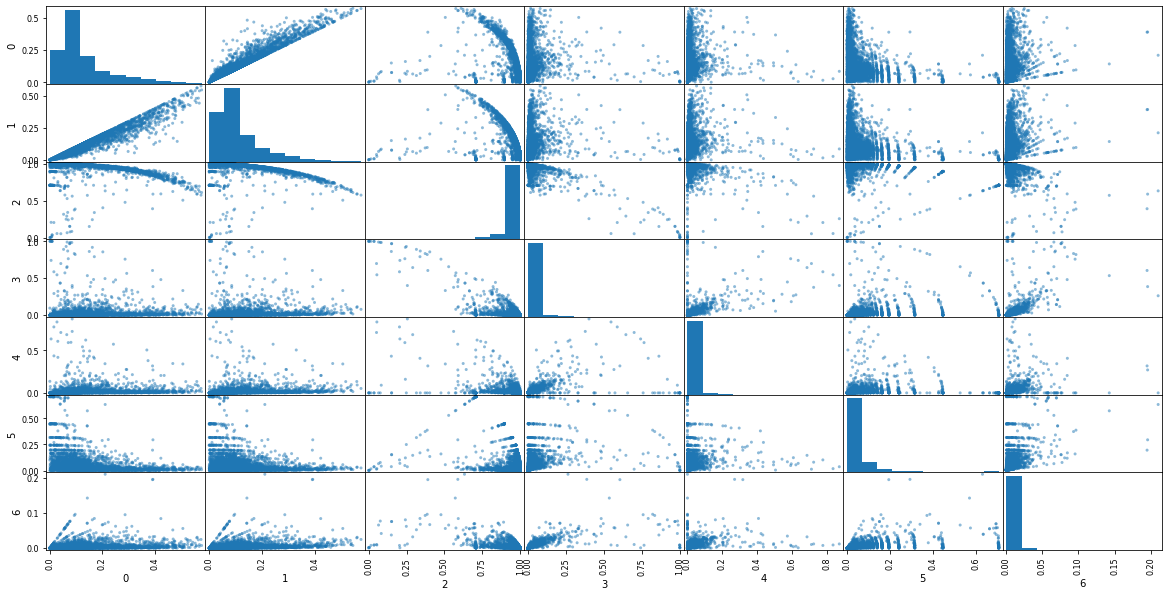

In [17]:
sh = pd.plotting.scatter_matrix(pd.DataFrame(df_normalized), figsize = (20,10))

## 5. Apply Hierarchical Clustering

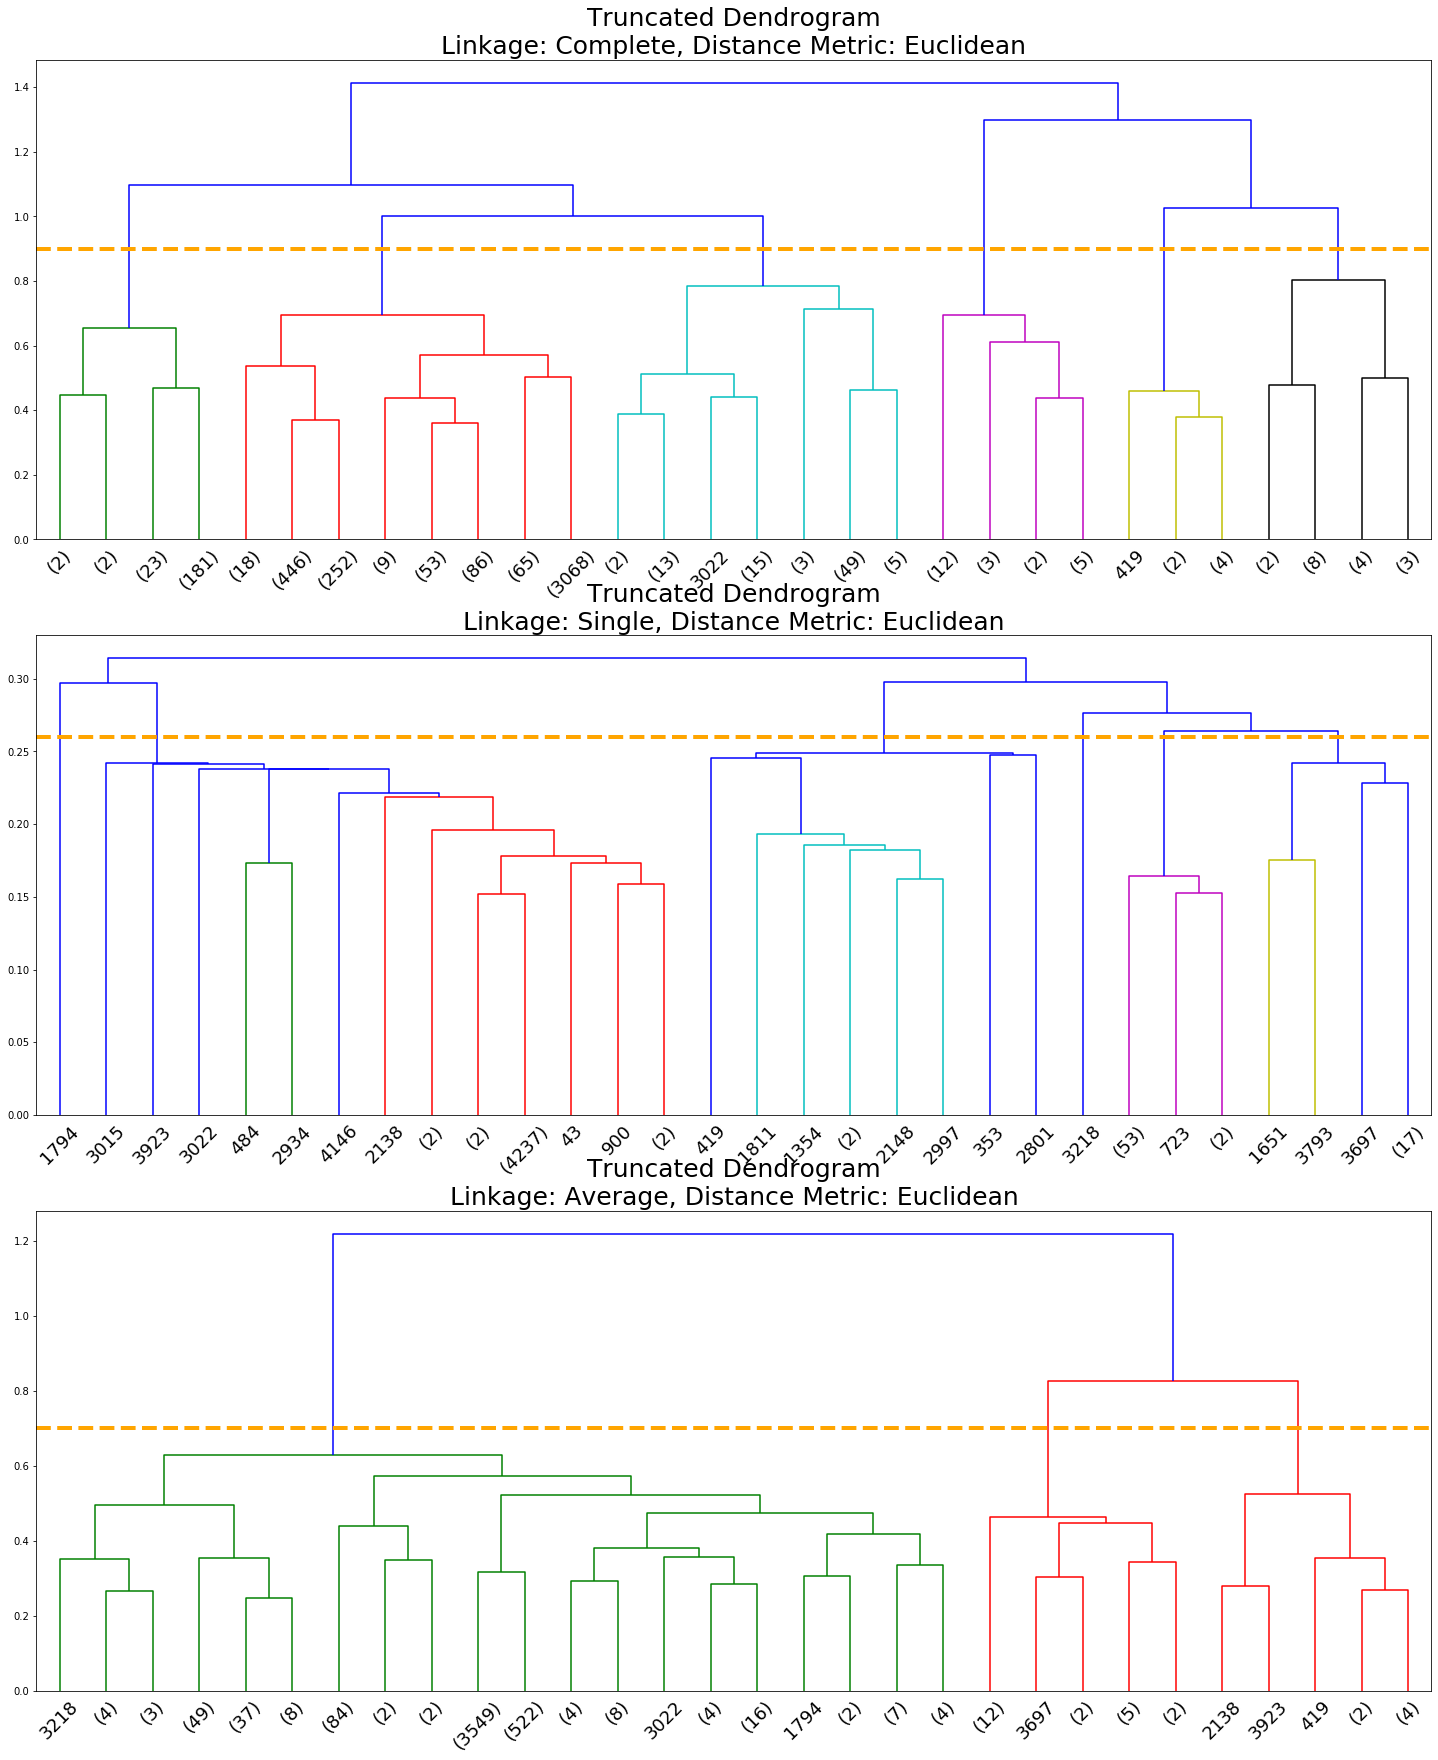

In [21]:
# Plot truncated dendrograms

from scipy.cluster.hierarchy import linkage, dendrogram, cophenet

fig, axes = plt.subplots(3,1, figsize=(25,30))

axes[0].set_title("Truncated Dendrogram\nLinkage: Complete, Distance Metric: Euclidean", fontsize=25)
complete_mergings = linkage(df_normalized, method='complete', metric='euclidean')
dn_complete = dendrogram(complete_mergings, truncate_mode='lastp', 
                         leaf_font_size=18., ax=axes[0])
axes[0].axhline(0.9,color='orange', linestyle='--', linewidth=4)

axes[1].set_title("Truncated Dendrogram\nLinkage: Single, Distance Metric: Euclidean", fontsize=25)
single_mergings = linkage(df_normalized, method='single', metric='euclidean')
dn_single = dendrogram(single_mergings, truncate_mode='lastp', 
                       leaf_font_size=18., ax=axes[1])
axes[1].axhline(0.26,color='orange', linestyle='--', linewidth=4)

axes[2].set_title("Truncated Dendrogram\nLinkage: Average, Distance Metric: Euclidean", fontsize=25)
average_mergings = linkage(df_normalized, method='average', metric='euclidean')
dn_average = dendrogram(average_mergings, truncate_mode='lastp', 
                        leaf_font_size=18., ax=axes[2])
axes[2].axhline(0.7,color='orange', linestyle='--', linewidth=4)

plt.show()

In [19]:
# Here, we will calculate the cophenetic correlation coefficients to compare the different linkages

from scipy.spatial.distance import pdist

c, coph_dists = cophenet(complete_mergings, pdist(df_normalized))
print("Cophenetic correlation coefficient for complete linkage is: ",c)
c, coph_dists = cophenet(single_mergings, pdist(df_normalized))
print("Cophenetic correlation coefficient for single linkage is: ",c)
c, coph_dists = cophenet(average_mergings, pdist(df_normalized))
print("Cophenetic correlation coefficient for average linkage is: ",c)

Cophenetic correlation coefficient for complete linkage is:  0.8292863328074289
Cophenetic correlation coefficient for single linkage is:  0.7971888255644336
Cophenetic correlation coefficient for average linkage is:  0.9258290803837665


**Clusters**:
Once a one big cluster is formed, the longest vertical distance (Euclidean distance in our case) without any horizontal line passing through it is selected and a horizontal line is drawn through it. The number of vertical lines this newly created horizontal line passes is equal to number of clusters. From the orange dashed lines above, complete and single linkage both have 6 clusters, while single linkage has 3 clusters.

**Which linkage works best**:
From the cophenetic correlation coefficients above, it looks like the average linkage works best with 0.93.

**Ways to improve clustering**:
- Datacentric approach - Feature engineering, imputation, remove outliers etc
- Model parameters - Change dissimilarity measure from Euclidean distance to Manhattan or correlation-based distance

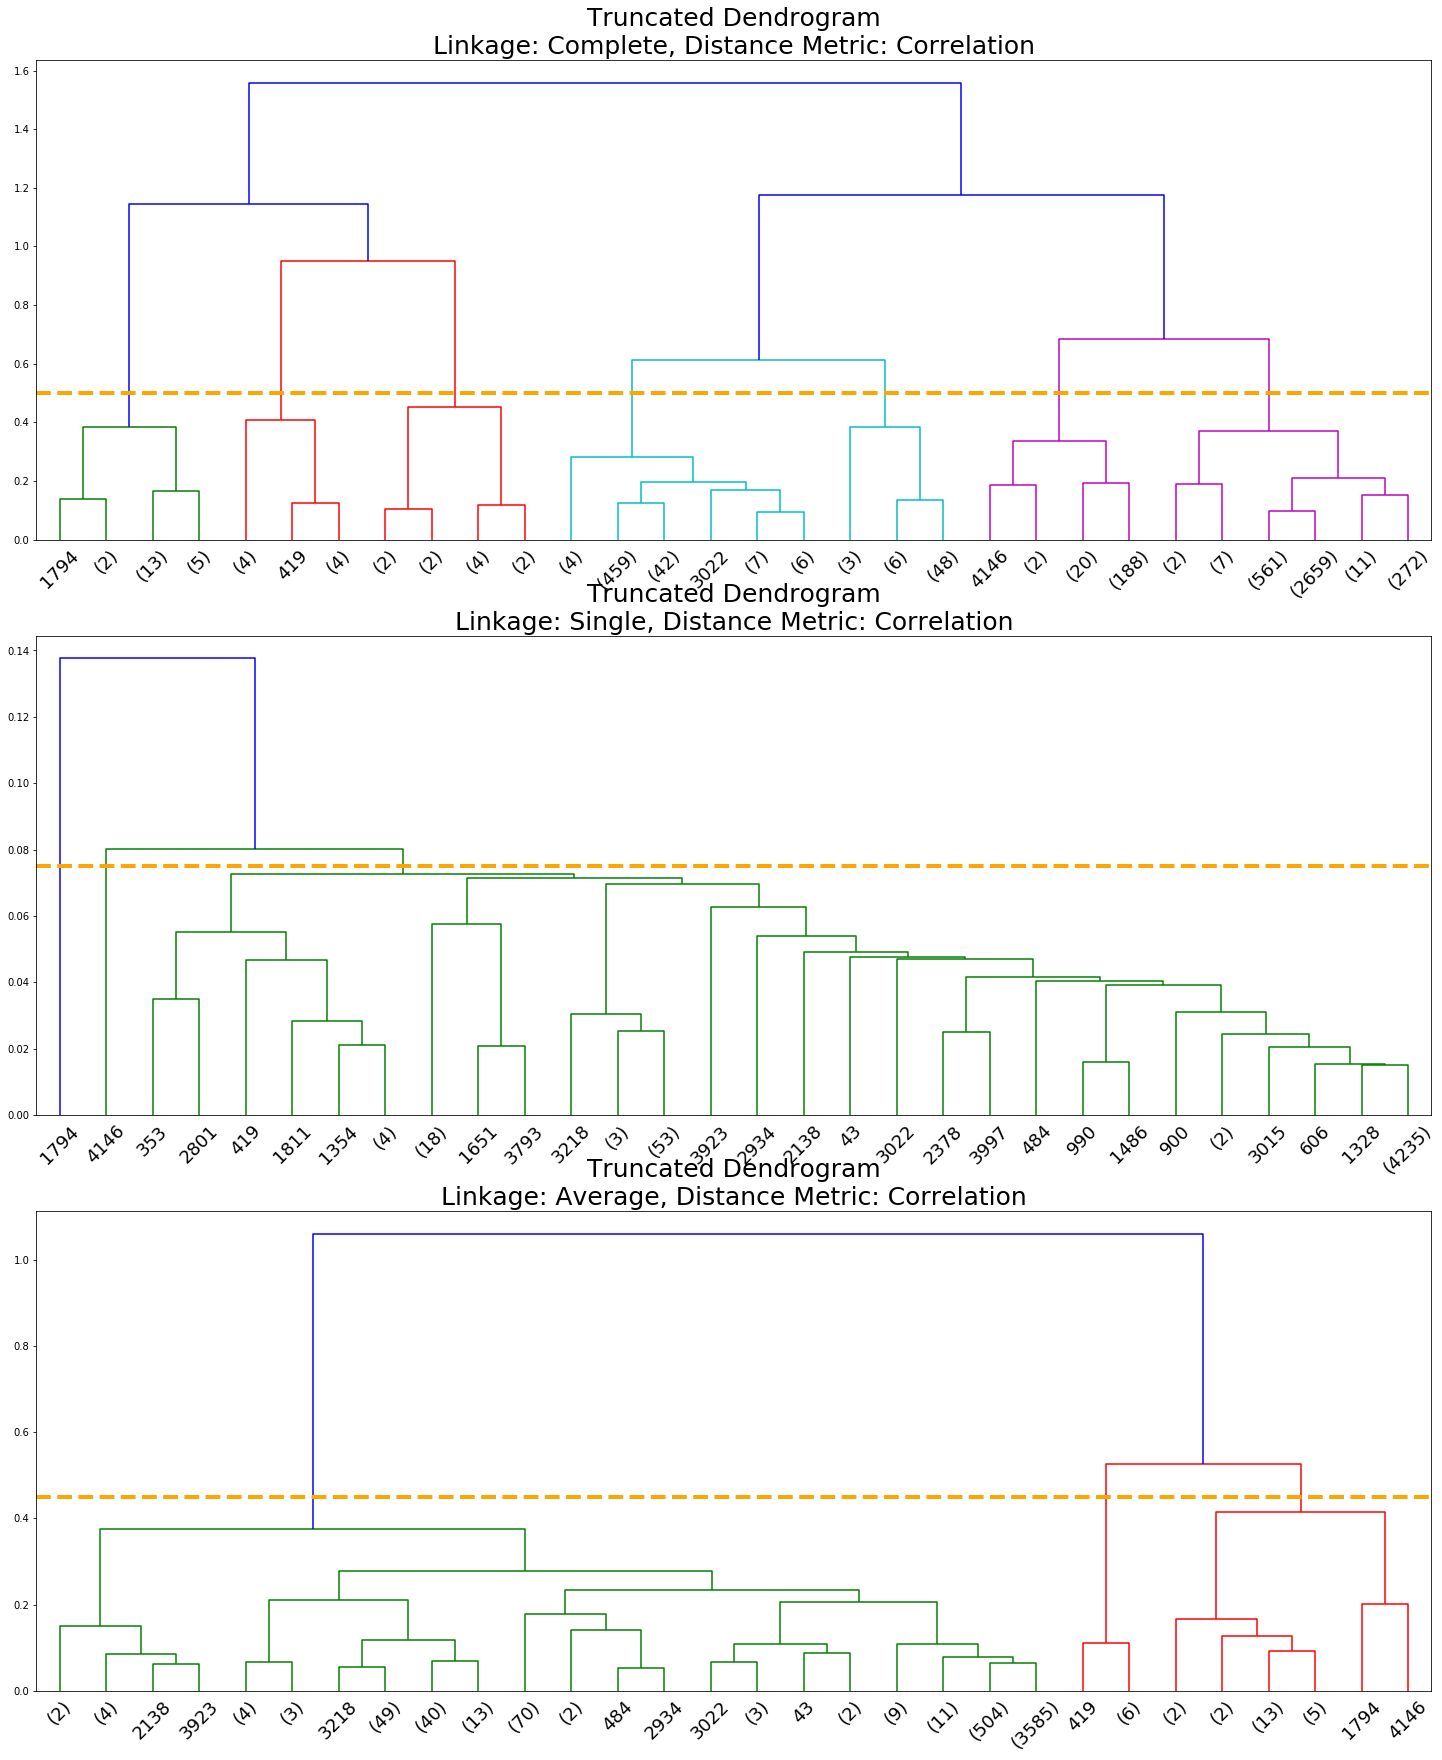

In [23]:
# Here, we will change the dissimilarity measure from Euclidean to correlation-based distance to try to improve clustering

fig, axes = plt.subplots(3,1, figsize=(25,30))

axes[0].set_title("Truncated Dendrogram\nLinkage: Complete, Distance Metric: Correlation", fontsize=25)
complete_mergings = linkage(df_normalized, method='complete', metric='correlation')
dn_complete = dendrogram(complete_mergings, truncate_mode='lastp', 
                         leaf_font_size=18., ax=axes[0])
axes[0].axhline(0.5,color='orange', linestyle='--', linewidth=4)

axes[1].set_title("Truncated Dendrogram\nLinkage: Single, Distance Metric: Correlation", fontsize=25)
single_mergings = linkage(df_normalized, method='single', metric='correlation')
dn_single = dendrogram(single_mergings, truncate_mode='lastp', 
                       leaf_font_size=18., ax=axes[1])
axes[1].axhline(0.075,color='orange', linestyle='--', linewidth=4)

axes[2].set_title("Truncated Dendrogram\nLinkage: Average, Distance Metric: Correlation", fontsize=25)
average_mergings = linkage(df_normalized, method='average', metric='correlation')
dn_average = dendrogram(average_mergings, truncate_mode='lastp', 
                        leaf_font_size=18., ax=axes[2])
axes[2].axhline(0.45,color='orange', linestyle='--', linewidth=4)

plt.show()

In [24]:
c, coph_dists = cophenet(complete_mergings, pdist(df_normalized))
print("Cophenetic correlation coefficient for complete linkage is: ",c)
c, coph_dists = cophenet(single_mergings, pdist(df_normalized))
print("Cophenetic correlation coefficient for single linkage is: ",c)
c, coph_dists = cophenet(average_mergings, pdist(df_normalized))
print("Cophenetic correlation coefficient for average linkage is: ",c)

Cophenetic correlation coefficient for complete linkage is:  0.5738542335301203
Cophenetic correlation coefficient for single linkage is:  0.723819311370506
Cophenetic correlation coefficient for average linkage is:  0.8348555606325693


**Results**: By changing the dissimilarity measure from Euclidean to correlation distance, the cophenetic correlation coefficient dropped for all three linkages. For both cases though, average linkage seems to work the best.

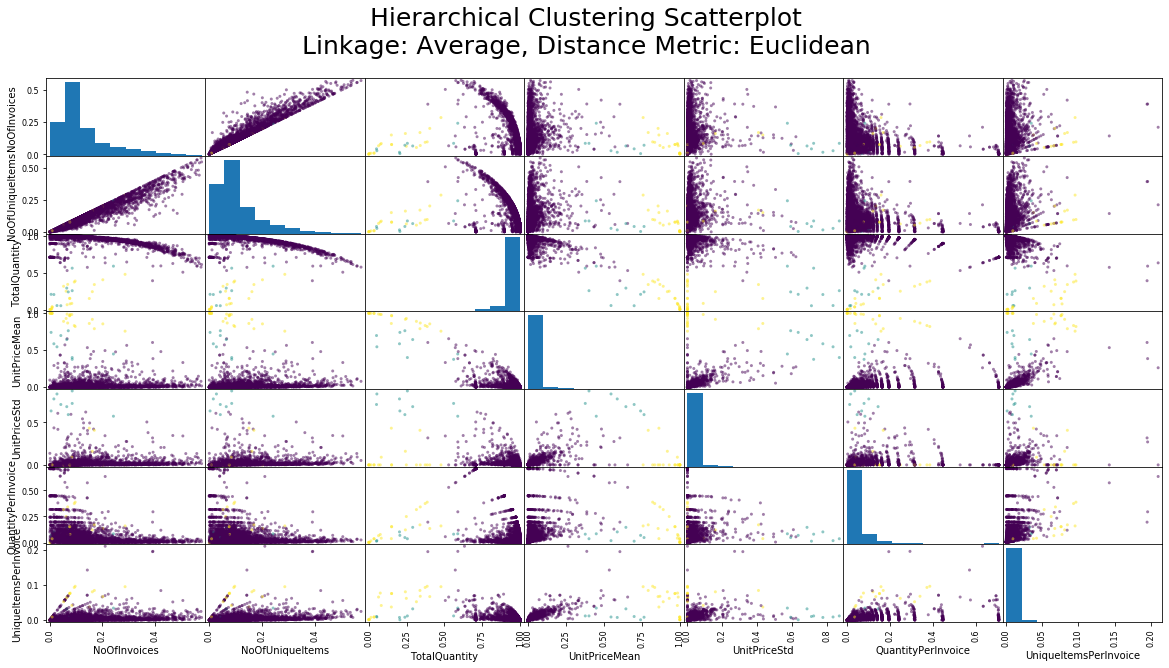

In [25]:
# Here, we'll plot a scatterplot of the results

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
labels = cluster.fit_predict(df_normalized)
df_plotting = pd.DataFrame(df_normalized, columns = ['NoOfInvoices', 'NoOfUniqueItems', 
                                                     'TotalQuantity', 'UnitPriceMean', 'UnitPriceStd', 
                                                     'QuantityPerInvoice', 'UniqueItemsPerInvoice'])


pd.plotting.scatter_matrix(df_plotting, c = labels, cmap = "viridis", figsize = (20,10))
plt.suptitle("Hierarchical Clustering Scatterplot\nLinkage: Average, Distance Metric: Euclidean", fontsize=25)
plt.show()

In [26]:
# Create a plotting function for scatterplots since we'll be using it a lot

def plotting_func(df, labels, title):
    df_plotting = pd.DataFrame(df, columns = ['NoOfInvoices', 'NoOfUniqueItems', 
                                                     'TotalQuantity', 'UnitPriceMean', 'UnitPriceStd', 
                                                     'QuantityPerInvoice', 'UniqueItemsPerInvoice'])
    pd.plotting.scatter_matrix(df_plotting, c = labels, cmap = "viridis", figsize = (20,10))
    plt.suptitle(title, fontsize=25)
    plt.show()
    return None

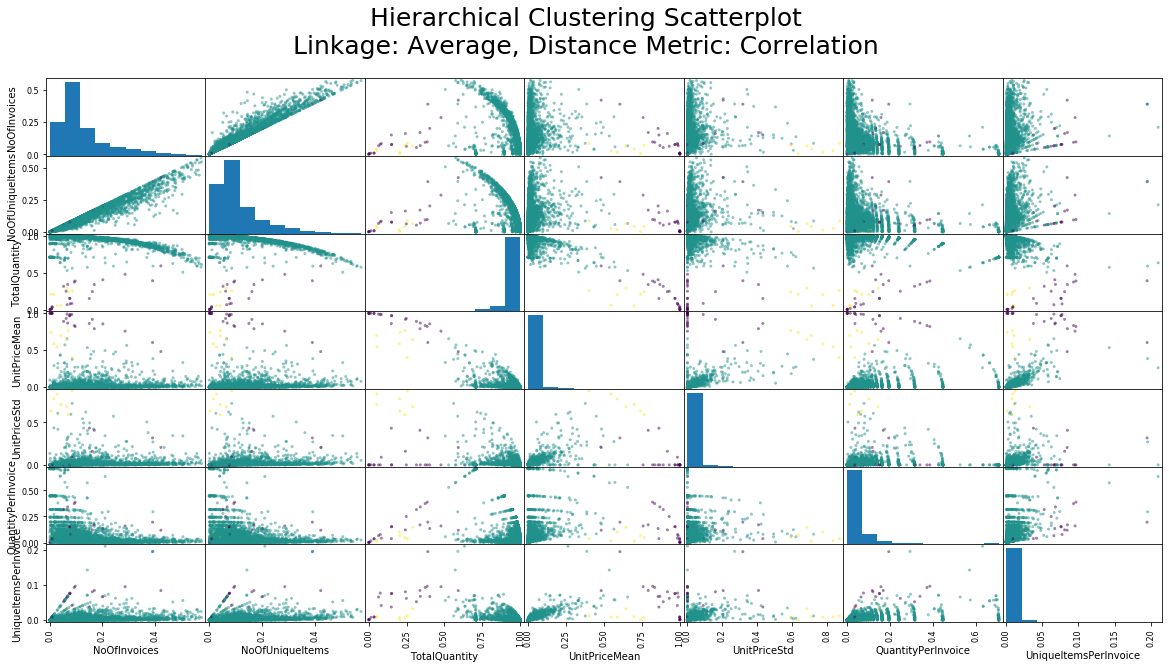

In [27]:
# Here, we'll do another scatterplot, but this time with the correlation instead of euclidean metric
cluster = AgglomerativeClustering(n_clusters=3, affinity='correlation', linkage='average')
cluster_labels = cluster.fit_predict(df_normalized)
title = "Hierarchical Clustering Scatterplot\nLinkage: Average, Distance Metric: Correlation"

# Plot
plotting_func(df_normalized, cluster_labels, title)

**Review of Clusters**:
Let's look at the first scatterplot with the Euclidean dissimilarity measure since it has the better cophenetic correlation coefficient. The plots with total quantity and unit price mean on the X-axis show the best cluster distribution. For total quantity, this makes sense as the more one buys, it could be multiple instances of a cheap item as seen during the EDA. It makes sense for unit price mean as well, as customers are clustered by their spending appetite. 

However, it looks like most of the data points are in a single cluster which may not be ideal.

## 6. Apply K-Means

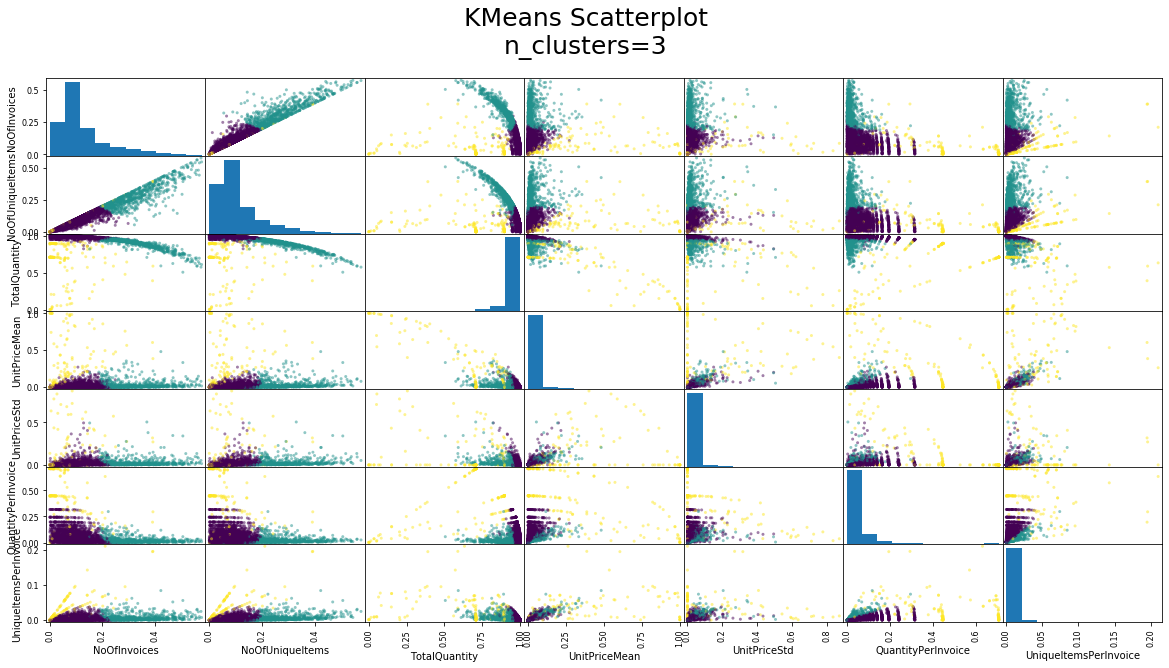

In [28]:
# Plot kmeans scatterplot

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(df_normalized)
title = "KMeans Scatterplot\nn_clusters=3"

# Plot
plotting_func(df_normalized, kmeans_labels, title)

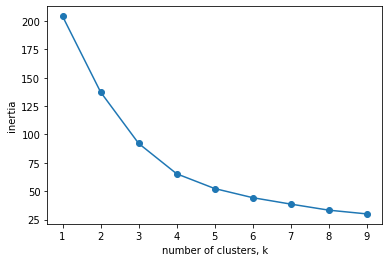

In [29]:
# Plot elbow plot and compare inertias

ks = range(1, 10)
inertias = []

for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_normalized)
    
    # Append the inertia to the list of inertias
    inertias.append(kmeans.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


One way to improve the clustering is to use an elbow plot. From the elbow plot above, at n_clusters=3 or 4, the inertia does not change that much anymore. Hence, let's use n_clusters=4 next.

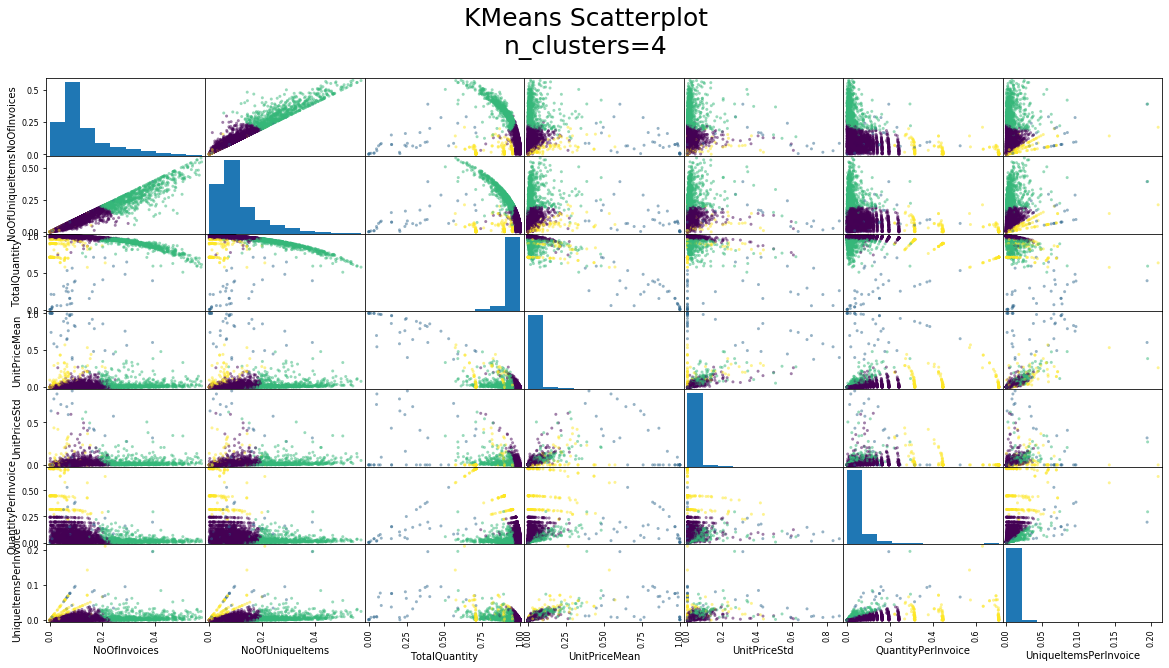

In [30]:
# Plot kmeans scatterplot with n_clusters=4

kmeans = KMeans(n_clusters=4)
kmeans_labels = kmeans.fit_predict(df_normalized)
title = "KMeans Scatterplot\nn_clusters=4"

# Plot
plotting_func(df_normalized, kmeans_labels, title)

## 7. Apply Gaussian Mixture Models (GMM)

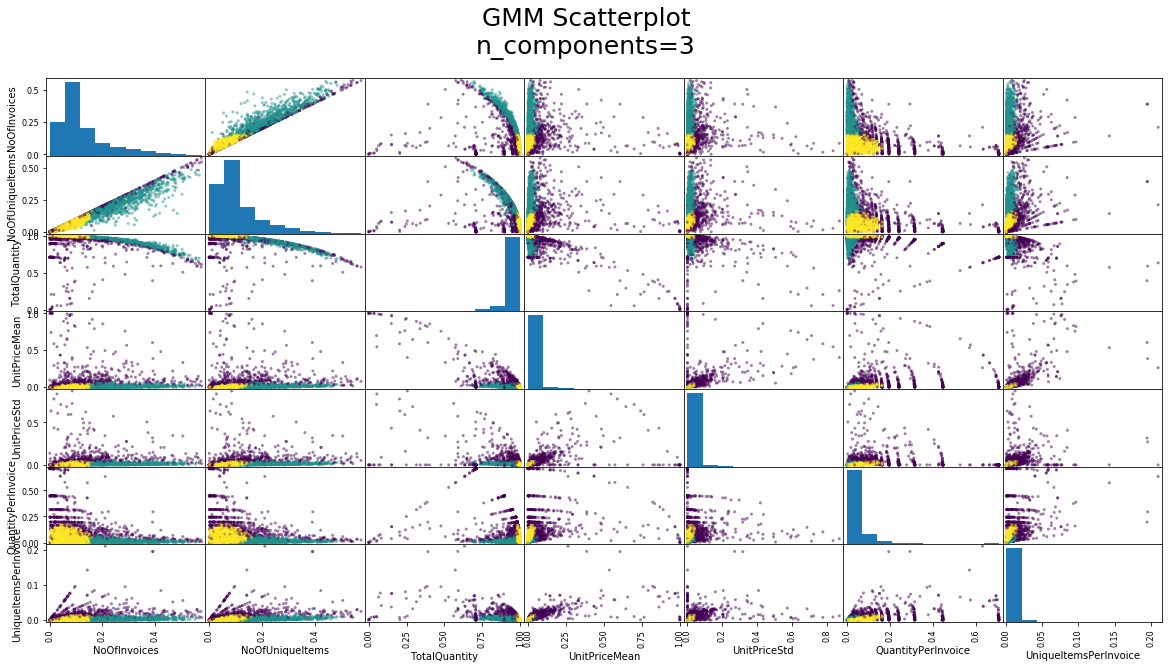

In [31]:
# Plot GMM scatterplot

from sklearn.mixture import GaussianMixture 
  
gmm = GaussianMixture(n_components = 3) 
gmm_labels = gmm.fit_predict(df_normalized) 
title = "GMM Scatterplot\nn_components=3"

# Plot
plotting_func(df_normalized, gmm_labels, title)

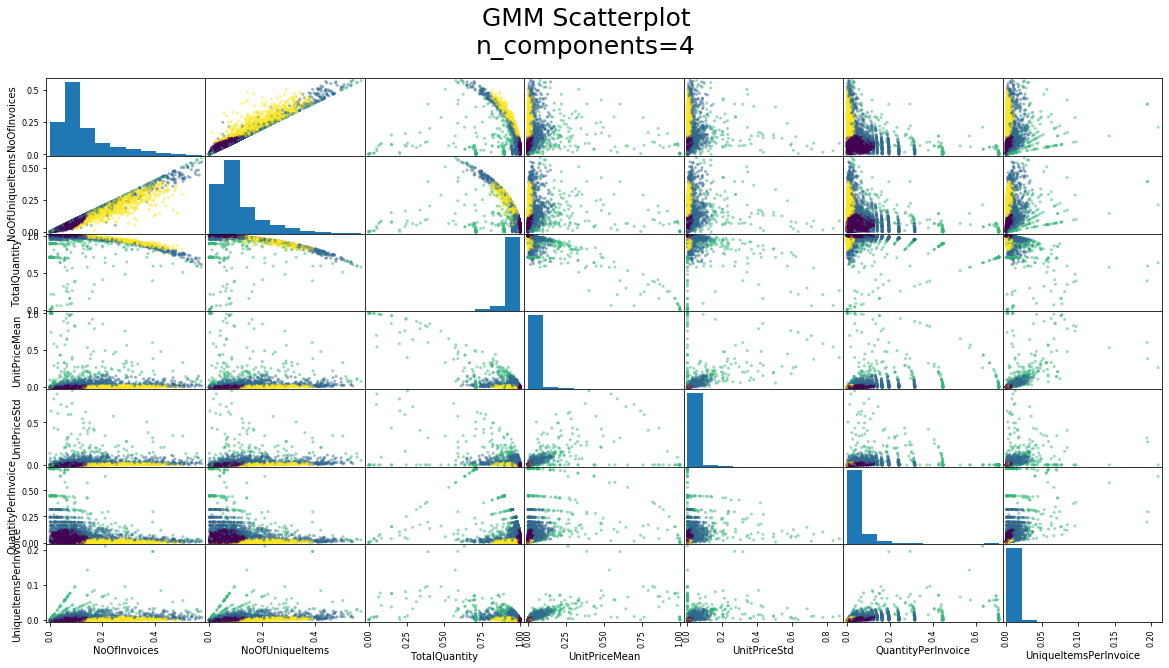

In [32]:
# Plot GMM scatterplot with n_components = 4

from sklearn.mixture import GaussianMixture 
  
gmm = GaussianMixture(n_components = 4) 
gmm_labels = gmm.fit_predict(df_normalized) 
title = "GMM Scatterplot\nn_components=4"

# Plot
plotting_func(df_normalized, gmm_labels, title)

**Review of Clusters**:
- Generally, it looks like the clustering is more evenly distributed for KMeans and GMM, compared to hierarchical clustering where most of the points are in a single cluster
- It looks like n_clusters=3 and n_components=3 provides better clustering for both Kmeans and GMM.

## 8. Exploring Removing Outliers

In [33]:
from scipy import stats

# Remove all outliers with z score >3
z = np.abs(stats.zscore(df_normalized))
df_norm_outliers = df_normalized[(z < 3).all(axis=1)]
print(df_normalized.shape)
print(df_norm_outliers.shape)

(4339, 7)
(4035, 7)


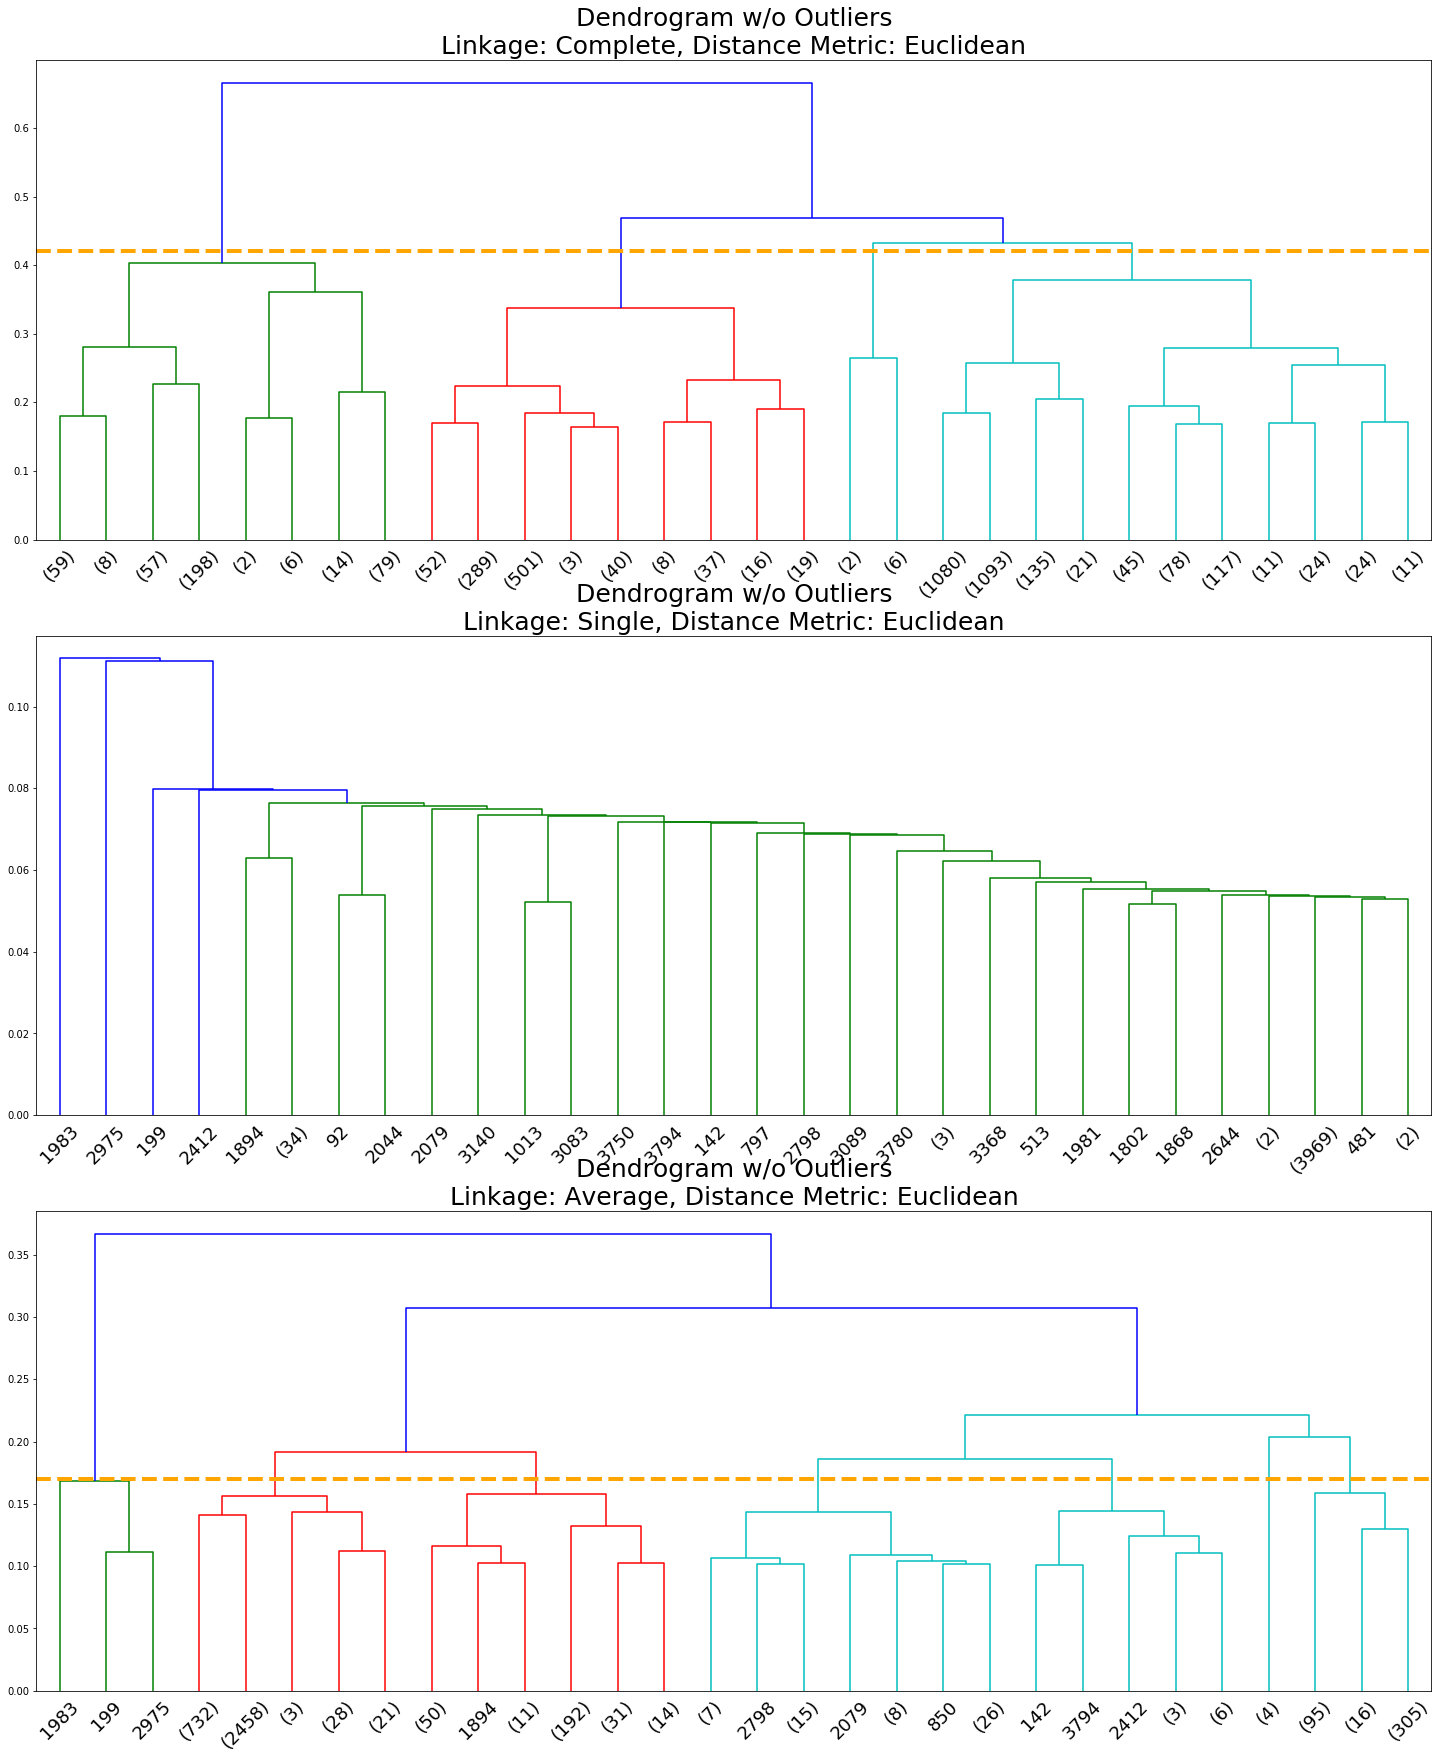

Cophenetic correlation coefficient for complete linkage is:  0.7673930267974468
Cophenetic correlation coefficient for single linkage is:  0.5085323748714807
Cophenetic correlation coefficient for average linkage is:  0.8316793204397862


In [34]:
fig, axes = plt.subplots(3,1, figsize=(25,30))

axes[0].set_title("Dendrogram w/o Outliers\nLinkage: Complete, Distance Metric: Euclidean", fontsize=25)
complete_mergings = linkage(df_norm_outliers, method='complete', metric='euclidean')
dn_complete = dendrogram(complete_mergings, truncate_mode='lastp', 
                         leaf_font_size=18., ax=axes[0])
axes[0].axhline(0.42,color='orange', linestyle='--', linewidth=4)

axes[1].set_title("Dendrogram w/o Outliers\nLinkage: Single, Distance Metric: Euclidean", fontsize=25)
single_mergings = linkage(df_norm_outliers, method='single', metric='euclidean')
dn_single = dendrogram(single_mergings, truncate_mode='lastp', 
                       leaf_font_size=18., ax=axes[1])
#axes[1].axhline(0.35,color='orange', linestyle='--', linewidth=4)

axes[2].set_title("Dendrogram w/o Outliers\nLinkage: Average, Distance Metric: Euclidean", fontsize=25)
average_mergings = linkage(df_norm_outliers, method='average', metric='euclidean')
dn_average = dendrogram(average_mergings, truncate_mode='lastp', 
                        leaf_font_size=18., ax=axes[2])
axes[2].axhline(0.17,color='orange', linestyle='--', linewidth=4)

plt.show()

c, coph_dists = cophenet(complete_mergings, pdist(df_norm_outliers))
print("Cophenetic correlation coefficient for complete linkage is: ",c)
c, coph_dists = cophenet(single_mergings, pdist(df_norm_outliers))
print("Cophenetic correlation coefficient for single linkage is: ",c)
c, coph_dists = cophenet(average_mergings, pdist(df_norm_outliers))
print("Cophenetic correlation coefficient for average linkage is: ",c)

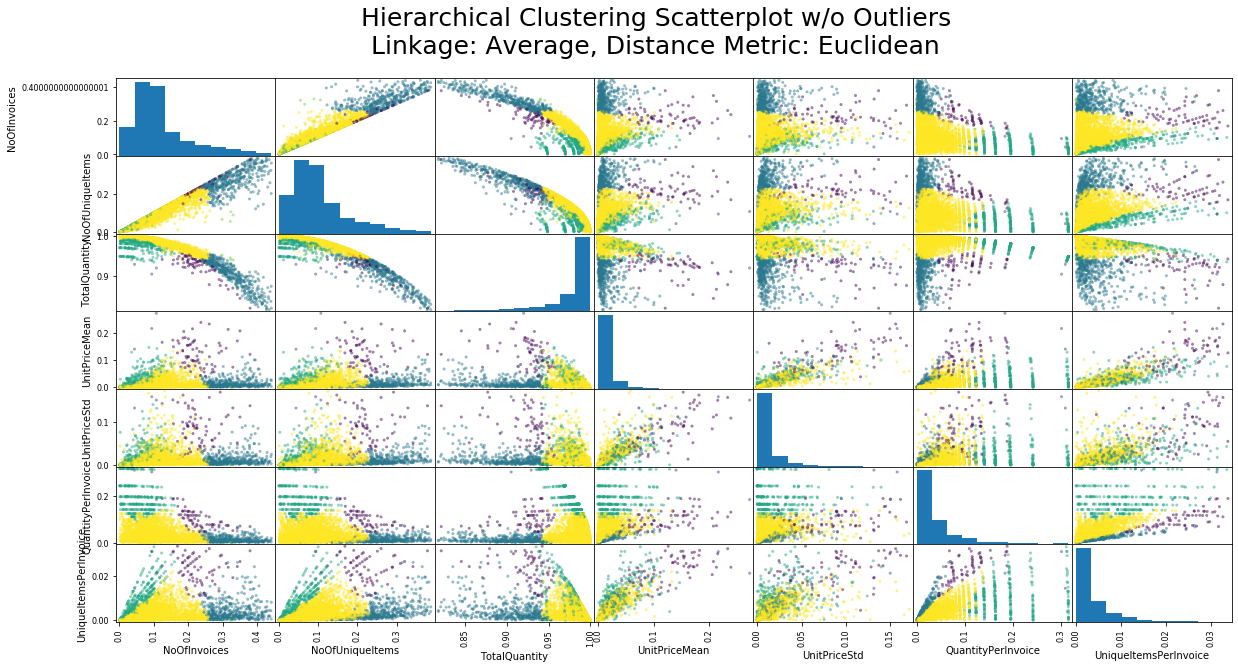

In [35]:
# Plot hierarchical scatterplot
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average')
cluster_labels = cluster.fit_predict(df_norm_outliers)
title = "Hierarchical Clustering Scatterplot w/o Outliers\nLinkage: Average, Distance Metric: Euclidean"

# Plot
plotting_func(df_norm_outliers, cluster_labels, title)

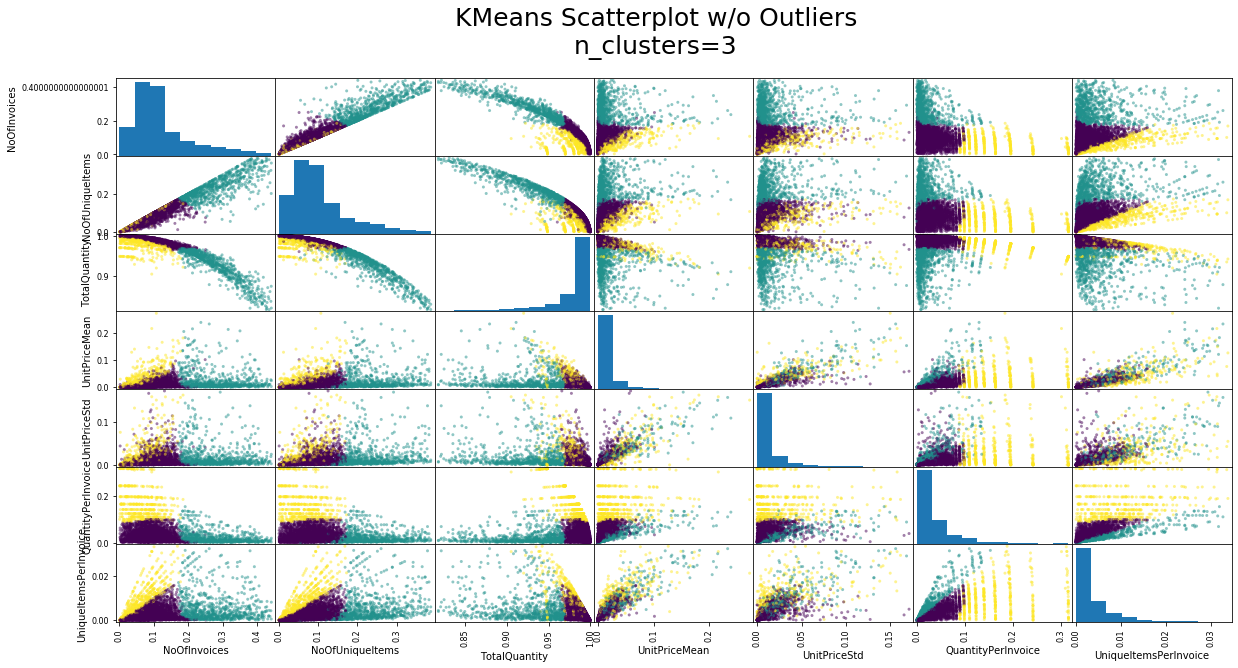

In [36]:
# Plot kmeans scatterplot
kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(df_norm_outliers)
title = "KMeans Scatterplot w/o Outliers\nn_clusters=3"

# Plot
plotting_func(df_norm_outliers, kmeans_labels, title)

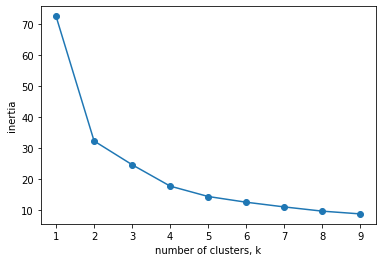

In [37]:
ks = range(1, 10)
inertias = []

for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_norm_outliers)
    
    # Append the inertia to the list of inertias
    inertias.append(kmeans.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

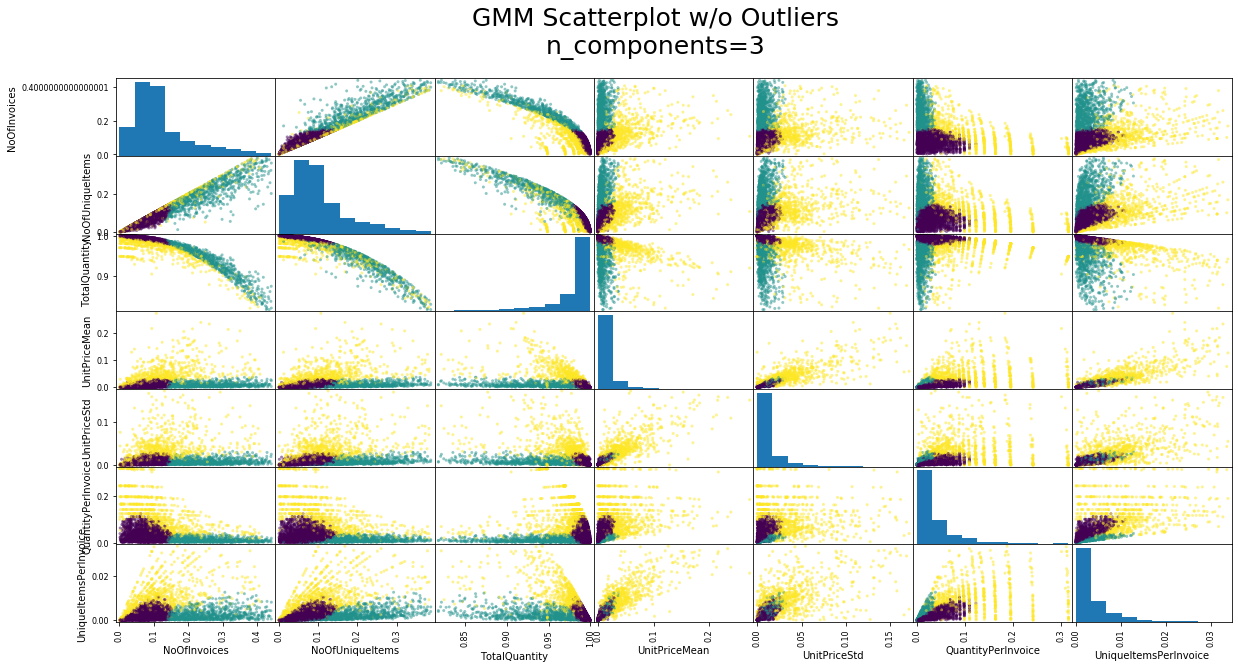

In [38]:
# Plot GMM scatterplot
gmm = GaussianMixture(n_components = 3) 
gmm_labels = gmm.fit_predict(df_norm_outliers) 
title = "GMM Scatterplot w/o Outliers\nn_components=3"

# Plot
plotting_func(df_norm_outliers, gmm_labels, title)

**Review of clusters**:
- Looks like removing outliers has significantly improved the distribution of the clusters!
- Especially so for hierarchical clustering, thus it looks like this method is very sensitive to outliers

## 9. Model Selection

In [39]:
from sklearn import metrics

# Get kmeans labels
kmeans = KMeans(n_clusters=3)
km_labels = kmeans.fit_predict(df_norm_outliers)

# Get hierarchical clustering labels
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
hc_labels = cluster.fit_predict(df_norm_outliers)

# Get gmm labels
gmm = GaussianMixture(n_components = 3) 
gmm_labels = gmm.fit_predict(df_norm_outliers) 

print("Silhouette Coefficient score for KMeans: ", metrics.silhouette_score(df_norm_outliers, km_labels, metric='euclidean'))
print("Silhouette Coefficient score for hierarchical clustering: ", metrics.silhouette_score(df_norm_outliers, hc_labels, metric='euclidean'))
print("Silhouette Coefficient score for GMM: ", metrics.silhouette_score(df_norm_outliers, gmm_labels, metric='euclidean'))

print("\nCalinski-Harabasz score for KMeans: ", metrics.calinski_harabasz_score(df_norm_outliers, km_labels))
print("Calinski-Harabasz score for hierarchical clustering: ", metrics.calinski_harabasz_score(df_norm_outliers, hc_labels))
print("Calinski-Harabasz score for GMM: ", metrics.calinski_harabasz_score(df_norm_outliers, gmm_labels))

print("\nDavies-Bouldin index for KMeans: ", metrics.davies_bouldin_score(df_norm_outliers, km_labels))
print("Davies-Bouldin index for hierarchical clustering: ", metrics.davies_bouldin_score(df_norm_outliers, hc_labels))
print("Davies-Bouldin index for GMM: ", metrics.davies_bouldin_score(df_norm_outliers, gmm_labels))

Silhouette Coefficient score for KMeans:  0.4848861921934306
Silhouette Coefficient score for hierarchical clustering:  0.5786985291694859
Silhouette Coefficient score for GMM:  0.4015235572226938

Calinski-Harabasz score for KMeans:  3945.711145656825
Calinski-Harabasz score for hierarchical clustering:  2005.9880737915373
Calinski-Harabasz score for GMM:  2214.2398884373074

Davies-Bouldin index for KMeans:  0.8670666169892703
Davies-Bouldin index for hierarchical clustering:  0.5641249647212094
Davies-Bouldin index for GMM:  1.33816856909293


**K-Means**

Advantages:
- Fast with linear complexity of O(n), as only computing the distances between points and group centres

Disadvantages:
- Have to guess the number of clusters at the start
- Results may not be repeatable and lack consistency, as the choice of cluster centres is random, and different runs of the algorithm may yield different results
- Only works well with circular datasets as only mean is used

**GMMs**

Advantages:
- Can work well with elliptical datasets in addition to circular datasets. This is because for GMMs the data points are Gaussian distributed, and by including both mean and standard deviation in x and y directions, an elliptical shape can be formed.
- Mixed membership: if a data point is in the middle of 2 overlapping clusters, we can simply define its class by saying it belongs X% to class 1 and Y% to class 2

Disadvantages:
- Have to guess the number of clusters at the start

**Hierarchical Clustering**

Advantages:
- Number of clusters does not have to be chosen at the start
- Not sensitive to the choice of distance metric
- If the underlying data has a hierarchical structure, the hierarchy can be recovered (other algorithms can't do this)

Disadvantages:
- Lower efficiency, with a time complexity of O(n³)
- Results are greatly affected by noise or outliers (This is validated in the outlier section below)

**Overall**: It's difficult to choose a model just based on the previous metrics. Silhouette Coefficient, Calinski-Harabasz, Davies-Bouldin index choose different models as the best one. Also, before normalization, I had a silhouette score of 0.96 for kmeans, but after normalization, it dropped greatly to 0.56. This is because normalisation transforms circular clusters into elliptical ones. Similarly, no normalization improved the Calinski-Harabasz score, but in contrast greatly dropped the Davies-Bouldin index.

## 10. Principal Component Analysis

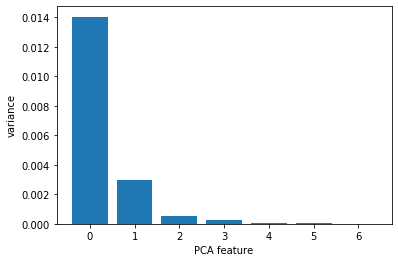

In [40]:
# Perform the necessary imports
from sklearn.decomposition import PCA

# Create a PCA instance: pca
pca = PCA()

pca.fit(df_norm_outliers)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

From the plot above, it looks like only the first 2 PCA features have significant variance, and thus the intrinsic dimension is 2. Thus, the best number of components to select should be 2.

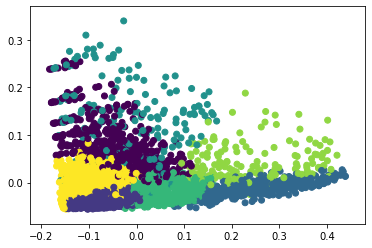

In [41]:
pca = PCA(n_components = 2)

# Fit the PCA instance to the scaled samples
pca.fit(df_norm_outliers)

# Transform the scaled samples: pca_features
pca_features = pca.transform(df_norm_outliers)

gmm = GaussianMixture(n_components = 7) 
gmm_labels = gmm.fit_predict(df_norm_outliers) 

# Make a scatter plot of the untransformed points
plt.scatter(pca_features[:,0], pca_features[:,1], c=gmm_labels)

# Keep axes on same scale
plt.axis('equal')
plt.show()